In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))
# Clean the input resume
cleaned_resume = clean_resume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)


In [3]:
import pandas as pd

# Try reading the CSV with a specific encoding
try:
    df = pd.read_csv('UpdatedResume_DataSet.csv', encoding='utf-8')
except UnicodeDecodeError:
    # If utf-8 fails, try another common encoding
    df = pd.read_csv('UpdatedResume_DataSet.csv', encoding='latin-1')

# Display the DataFrame
print(df.head())

       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \nMay 2013 to May 2017 B.E  ...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...
4  Data Science  Education Details \n MCA   YMCAUST,  Faridabad...


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22448\2380412765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_plot = sns.countplot(x=df['Category'], palette='hls')


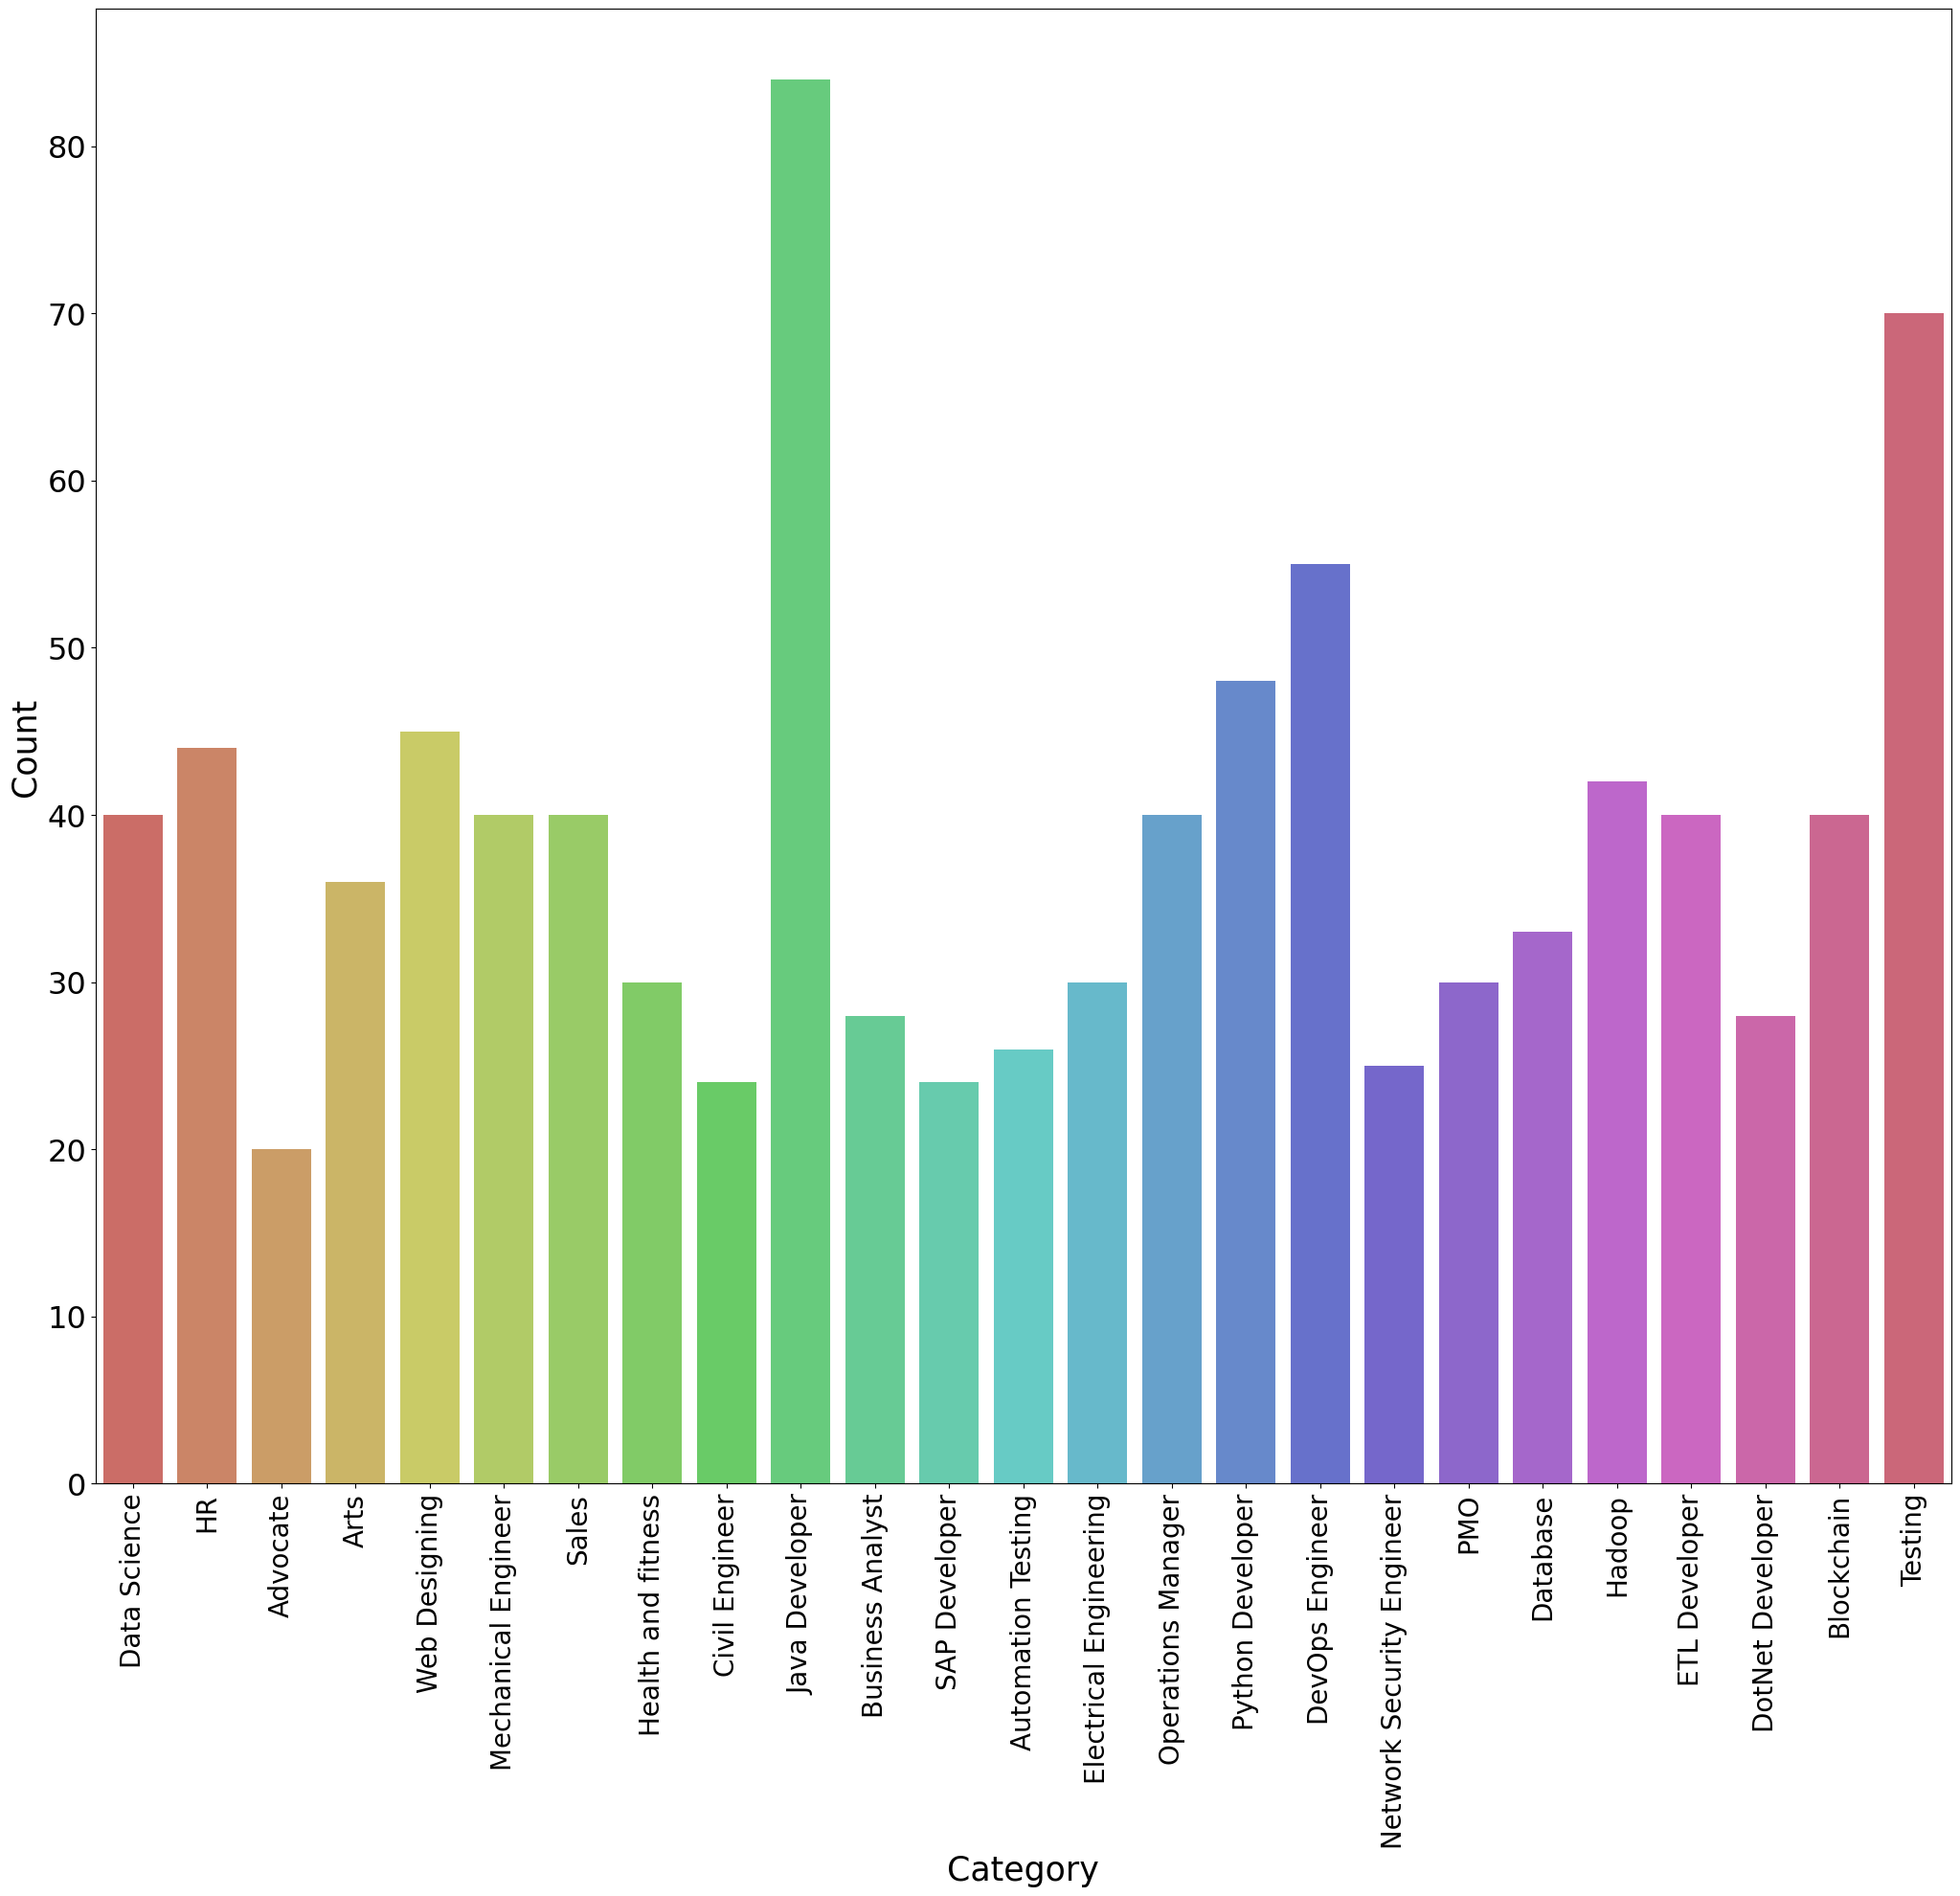

In [6]:
plt.figure(figsize=(25,20))
# sns_plot = sns.countplot(x=df['Category'])
sns_plot = sns.countplot(x=df['Category'], palette='hls')

# Increase the size of the x and y labels
sns_plot.set_xlabel('Category', fontsize=25)
sns_plot.set_ylabel('Count', fontsize=25)

# Increase the size of the tick labels
sns_plot.tick_params(axis='x', labelsize=20)
sns_plot.tick_params(axis='y', labelsize=23)

plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x22417e72a80>,
 [Text(0.2713778876572784, 1.0659990816556428, 'Data Science'),
  Text(-0.2760169132440188, 1.064807336377452, 'HR'),
  Text(-0.6760317729495154, 0.8677448023253928, 'Advocate'),
  Text(-0.9245540613406115, 0.5959863988872406, 'Arts'),
  Text(-1.0604773781703392, 0.2922117902976604, 'Web Designing'),
  Text(-1.0997393174018222, -0.023946476997137516, 'Mechanical Engineer'),
  Text(-1.050014686173239, -0.3278248904834937, 'Sales'),
  Text(-0.9258494300670969, -0.5939720808627558, 'Health and fitness'),
  Text(-0.7410131843014196, -0.8129572317726624, 'Civil Engineer'),
  Text(-0.5058866800026782, -0.9767695055620175, 'Java Developer'),
  Text(-0.2364272212238464, -1.0742914730483393, 'Business Analyst'),
  Text(0.049077817217391684, -1.0989046218199177, 'SAP Developer'),
  Text(0.3312520969509712, -1.04893853407413, 'Automation Testing'),
  Text(0.5787758445131055, -0.9354242469639868, 'Electrical Engineering'),
  Text(0.7731466211125935, -

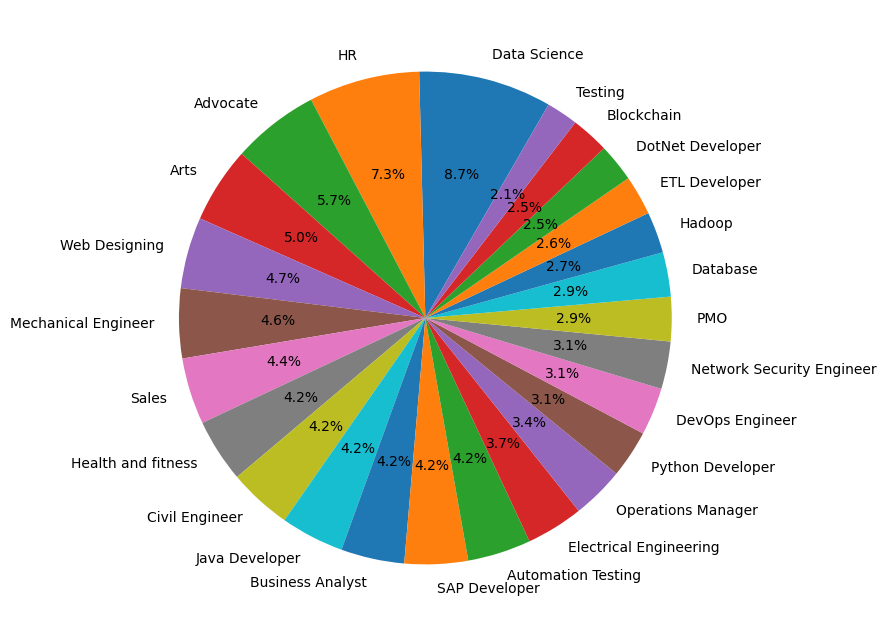

In [7]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(12,8))
plt.pie(counts,labels=labels, autopct='%1.1f%%',startangle=60)

In [15]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [8]:
df['Resume'][3]

"Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Tableau â?¢ SAP HANA SQL â?¢ SAP HANA PAL â?¢ MS SQL â?¢ SAP Lumira â?¢ C# â?¢ Linear Programming â?¢ Data Modelling â?¢ Advance Analytics â?¢ SCM Analytics â?¢ Retail Analytics â?¢Social Media Analytics â?¢ NLP Education Details \nJanuary 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\nData Science Consultant \n\nConsultant - Deloitte USI\nSkill Details \nLINEAR PROGRAMMING- Exprience - 6 months\nRETAIL- Exprience - 6 months\nRETAIL MARKETING- Exprience - 6 months\nSCM- Exprience - 6 months\nSQL- Exprience - Less than 1 year months\nDeep Learning- Exprience - Less than 1 year months\nMachine learning- Exprience - Less than 1 year months\nPython- Exprience - Less than 1 year months\nR- Exprience - Less tha

In [11]:
import re
import string
from nltk.corpus import stopwords  # Import stopwords from NLTK

def clean_resume(text):
  """
  This function cleans a resume text by removing stopwords and special characters.

  Args:
      text: The text of the resume document.

  Returns:
      A string containing the cleaned resume text.
  """
  # Lowercase the text
  text = text.lower()

  # Remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  # Remove stopwords (using NLTK stopwords for English)
  stop_words = stopwords.words('english')
  text = ' '.join([word for word in text.split() if word not in stop_words])

  # Remove extra whitespace
  text = ' '.join(text.split())

  return text

# Example usage
resume_text = "This is a sample resume with stopwords and special characters!@#$%^"
cleaned_text = clean_resume(resume_text)
print(cleaned_text)


sample resume stopwords special characters


In [12]:
import re
def clean_resume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22448\2684993946.py:3: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22448\2684993946.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22448\2684993946.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\ASUS\AppData\Local\Temp\

In [18]:
df['Resume']=df['Resume'].apply(lambda x: clean_resume(x))
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

Word to Categorical Values

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [21]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

Vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
required_text=tfidf.transform(df['Resume'])

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X_train,X_test, y_train, y_test=train_test_split(required_text, df['Category'],test_size=0.33,random_state=30)

In [25]:
X_train.shape

(644, 7351)

In [26]:
X_test.shape

(318, 7351)

Model Training

In [27]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.9591194968553459

In [28]:
y_pred

array([ 8, 24, 23, 18, 21, 16,  0, 22, 15, 15, 20,  0, 17,  9,  1, 12, 22,
       13, 12, 23, 13,  3, 20, 20, 14, 22,  8, 15,  6, 10,  6, 18, 22, 20,
       12, 13, 16,  2, 23,  0, 18, 15, 21,  1, 19, 24,  1, 15, 15,  8,  1,
       18,  8, 16, 15, 23, 11, 15, 23, 11, 16, 23,  0,  7, 13, 14, 18, 18,
        2, 13, 15, 21, 11, 13,  7, 13, 17,  9, 19, 11, 18, 11, 20,  3,  3,
       14, 23, 15, 14, 23, 17, 15,  6,  2,  9,  9, 10, 15,  3,  8, 11, 12,
       21,  0, 24, 14,  3, 22, 15, 15,  4, 12, 23,  6, 20, 13, 10, 11, 10,
       16,  6,  8,  7, 15, 18, 17, 17,  1, 24,  3,  7, 22, 23,  9, 14, 20,
       15, 10,  3, 15, 22,  1,  6, 18, 24, 20, 16, 16, 23,  3, 18, 21, 16,
       15, 13,  3,  4, 20,  1, 23, 10, 23, 23,  3, 20, 24, 19, 15, 23, 16,
        9, 15, 14, 20, 23, 10,  9, 16,  3, 18, 21, 15, 15, 16, 22, 24, 13,
       15,  3,  9, 12, 20, 15, 20, 13, 20, 12,  2, 23, 14, 24, 17, 19, 24,
       20,  4, 11, 15, 13, 21,  3,  8, 12,  7, 16, 19, 13,  8,  8,  7,  8,
        3,  5, 13, 12,  7

Prediction System

In [30]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [31]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [32]:

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))
# Clean the input resume
cleaned_resume = clean_resume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)


Predicted Category: Data Science
6
